In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfSuino = pd.read_excel("data/cepea_suinos.xls")
dfMilho = pd.read_excel("data/cepea_milho.xls")
dfSoja = pd.read_excel("data/cepea_soja.xls")

In [3]:
dfSuino.head()

,Data,MG,PR,RS,SC,SP
0,01/07/2010,2.73,2.21,2.21,2.17,2.56
1,02/07/2010,2.76,2.22,2.22,2.19,2.57
2,05/07/2010,2.73,2.22,2.20,2.19,2.58
3,06/07/2010,2.73,2.22,2.23,2.23,2.59
4,07/07/2010,2.73,2.26,2.21,2.23,2.59


In [4]:
dfSuino['Data'] = pd.to_datetime(dfSuino['Data'], format='%d/%m/%Y')
dfSuino.sort_values(by='Data',inplace=True, ascending=True)
dfSuino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 0 to 1731
Data columns (total 6 columns):
Data    1732 non-null datetime64[ns]
MG      1732 non-null float64
PR      1732 non-null float64
RS      1732 non-null float64
SC      1732 non-null float64
SP      1731 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 94.7 KB


In [5]:
dfSuino.describe()

,MG,PR,RS,SC,SP
count,1732.000000,1732.000000,1732.000000,1732.000000,1731.000000
mean,3.590918,3.078874,2.943585,2.996259,3.455939
std,0.682639,0.642331,0.554284,0.555119,0.739867
min,2.100000,1.760000,1.830000,1.790000,1.900000
25%,3.057500,2.527500,2.440000,2.490000,2.880000
50%,3.640000,3.110000,3.010000,3.110000,3.460000
75%,4.130000,3.620000,3.390000,3.410000,4.040000
max,5.090000,4.550000,4.110000,4.190000,5.280000


In [6]:
dfMilho.head()

,Data,À vista R$,À vista US$
0,02/08/2004,18.24,5.98
1,03/08/2004,18.04,5.91
2,04/08/2004,18.02,5.90
3,05/08/2004,18.06,5.89
4,06/08/2004,18.13,5.98


In [7]:
dfMilho['Data'] = pd.to_datetime(dfMilho['Data'], format='%d/%m/%Y')
dfMilho.sort_values(by='Data',inplace=True, ascending=True)
dfMilho.describe()

,À vista R$,À vista US$
count,3321.000000,3321.000000
mean,26.329015,11.690407
std,7.480395,3.530350
min,0.000000,0.000000
25%,20.090000,8.960000
50%,25.790000,10.880000
75%,30.370000,14.540000
max,53.910000,19.960000


In [8]:
dfSoja.head()

,Data,À vista R$,À vista US$
0,13/03/2006,27.66,12.96
1,14/03/2006,27.45,12.91
2,15/03/2006,27.58,13.00
3,16/03/2006,26.97,12.78
4,17/03/2006,26.96,12.68


In [9]:
dfSoja['Data'] = pd.to_datetime(dfSoja['Data'], format='%d/%m/%Y')
dfSoja.sort_values(by='Data',inplace=True, ascending=True)
dfSoja.describe()

,À vista R$,À vista US$
count,2925.000000,2925.000000
mean,57.444164,25.293258
std,16.602557,6.071179
min,26.570000,12.400000
25%,45.640000,21.390000
50%,53.400000,24.630000
75%,71.830000,29.850000
max,97.610000,45.320000


In [10]:
minSuinoData = dfSuino.Data[0]
minMilhoData = dfMilho.Data[0]
minSojaData = dfSoja.Data[0]

In [11]:
minData = max(minSuinoData, minMilhoData, minSojaData)
print(minData)

2010-07-01 00:00:00


In [12]:
import datetime
minData = datetime.datetime(2011, 1, 1, 0, 0)
print(minData)

2011-01-01 00:00:00


In [13]:
dfSuino = dfSuino[dfSuino.Data > minData]
dfMilho = dfMilho[dfMilho.Data > minData]
dfSoja = dfSoja[dfSoja.Data > minData]

In [14]:
dfSuino.count()

Data    1719
MG      1719
PR      1719
RS      1719
SC      1719
SP      1719
dtype: int64

In [15]:
dfMilho.count()

Data           1727
À vista R$     1727
À vista US$    1727
dtype: int64

In [16]:
dfSoja.count()

Data           1730
À vista R$     1730
À vista US$    1730
dtype: int64

In [17]:
dfSuino.set_index(dfSuino.Data, inplace=True)
dfSuino.drop('Data', axis=1, inplace=True)
dfSuino.head()

,MG,PR,RS,SC,SP
Data,,,,,
2011-01-03,3.24,2.69,2.66,2.67,3.11
2011-01-04,3.24,2.69,2.65,2.67,3.09
2011-01-05,3.23,2.67,2.60,2.67,3.08
2011-01-06,3.23,2.67,2.61,2.67,3.08
2011-01-07,3.11,2.65,2.59,2.67,3.07


In [18]:
dfMilho.set_index(dfMilho.Data, inplace=True)
dfMilho.drop('Data', axis=1, inplace=True)
dfMilho.drop('À vista US$', axis=1, inplace=True)
dfMilho.head()

,À vista R$
Data,
2011-01-03,28.23
2011-01-04,28.33
2011-01-05,28.51
2011-01-06,28.71
2011-01-07,28.97


In [19]:
dfSoja.set_index(dfSoja.Data, inplace=True)
dfSoja.drop('Data', axis=1, inplace=True)
dfSoja.drop('À vista US$', axis=1, inplace=True)
dfSoja.head()

,À vista R$
Data,
2011-01-03,49.88
2011-01-04,49.79
2011-01-05,49.71
2011-01-06,50.50
2011-01-07,50.00


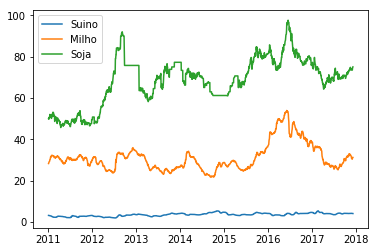

In [20]:
linhaSuino = plt.plot(dfSuino['SP'], label="Suino")
linhaMilho = plt.plot(dfMilho['À vista R$'], label="Milho")
linhaSoja = plt.plot(dfSoja['À vista R$'], label="Soja")
first_legend = plt.legend(handles=[linhaSuino[0], linhaMilho[0], linhaSoja[0]])
plt.show()

In [21]:
dfSuino['SPnorm'] = (dfSuino['SP'] - dfSuino['SP'].mean())/(dfSuino['SP'].max() - dfSuino['SP'].min())

In [22]:
dfMilho['precoNorm'] = (dfMilho['À vista R$'] - dfMilho['À vista R$'].mean())/(dfMilho['À vista R$'].max() - dfMilho['À vista R$'].min())

In [23]:
dfSoja['precoNorm'] = (dfSoja['À vista R$'] - dfSoja['À vista R$'].mean())/(dfSoja['À vista R$'].max() - dfSoja['À vista R$'].min())

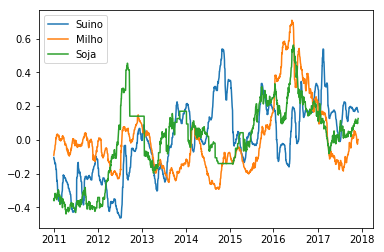

In [24]:
linhaSuino = plt.plot(dfSuino['SPnorm'], label="Suino")
linhaMilho = plt.plot(dfMilho['precoNorm'], label="Milho")
linhaSoja = plt.plot(dfSoja['precoNorm'], label="Soja")
first_legend = plt.legend(handles=[linhaSuino[0], linhaMilho[0], linhaSoja[0]])
plt.show()

In [25]:
from scipy.stats import pearsonr

In [26]:
dfMerged = pd.merge(dfSuino, dfMilho, how='inner', left_index=True, right_index=True)
dfMerged.head()

,MG,PR,RS,SC,SP,SPnorm,À vista R$,precoNorm
Data,,,,,,,,
2011-01-03,3.24,2.69,2.66,2.67,3.11,-0.103831,28.23,-0.090312
2011-01-04,3.24,2.69,2.65,2.67,3.09,-0.109748,28.33,-0.087201
2011-01-05,3.23,2.67,2.60,2.67,3.08,-0.112707,28.51,-0.081603
2011-01-06,3.23,2.67,2.61,2.67,3.08,-0.112707,28.71,-0.075382
2011-01-07,3.11,2.65,2.59,2.67,3.07,-0.115665,28.97,-0.067295


In [27]:
dfMerged = pd.merge(dfMerged, dfSoja, how="inner", left_index=True, right_index=True)
dfMerged.head()

,MG,PR,RS,SC,SP,SPnorm,À vista R$_x,precoNorm_x,À vista R$_y,precoNorm_y
Data,,,,,,,,,,
2011-01-03,3.24,2.69,2.66,2.67,3.11,-0.103831,28.23,-0.090312,49.88,-0.357291
2011-01-04,3.24,2.69,2.65,2.67,3.09,-0.109748,28.33,-0.087201,49.79,-0.359024
2011-01-05,3.23,2.67,2.60,2.67,3.08,-0.112707,28.51,-0.081603,49.71,-0.360565
2011-01-06,3.23,2.67,2.61,2.67,3.08,-0.112707,28.71,-0.075382,50.50,-0.345352
2011-01-07,3.11,2.65,2.59,2.67,3.07,-0.115665,28.97,-0.067295,50.00,-0.354981


In [28]:
dfMerged.drop('precoNorm_x', axis=1, inplace=True)
dfMerged.drop('precoNorm_y', axis=1, inplace=True)
dfMerged.drop('SPnorm', axis=1, inplace=True)
dfMerged.head()

,MG,PR,RS,SC,SP,À vista R$_x,À vista R$_y
Data,,,,,,,
2011-01-03,3.24,2.69,2.66,2.67,3.11,28.23,49.88
2011-01-04,3.24,2.69,2.65,2.67,3.09,28.33,49.79
2011-01-05,3.23,2.67,2.60,2.67,3.08,28.51,49.71
2011-01-06,3.23,2.67,2.61,2.67,3.08,28.71,50.50
2011-01-07,3.11,2.65,2.59,2.67,3.07,28.97,50.00


In [29]:
dfMerged.rename(columns={"À vista R$_x" : "pMilho", "À vista R$_y" : "pSoja"}, inplace=True)
dfMerged.head()

,MG,PR,RS,SC,SP,pMilho,pSoja
Data,,,,,,,
2011-01-03,3.24,2.69,2.66,2.67,3.11,28.23,49.88
2011-01-04,3.24,2.69,2.65,2.67,3.09,28.33,49.79
2011-01-05,3.23,2.67,2.60,2.67,3.08,28.51,49.71
2011-01-06,3.23,2.67,2.61,2.67,3.08,28.71,50.50
2011-01-07,3.11,2.65,2.59,2.67,3.07,28.97,50.00


In [30]:
corrMat = dfMerged.corr()
corrMat

,MG,PR,RS,SC,SP,pMilho,pSoja
MG,1.000000,0.972261,0.947619,0.954162,0.980380,0.195484,0.511337
PR,0.972261,1.000000,0.976677,0.979211,0.986298,0.128233,0.463385
RS,0.947619,0.976677,1.000000,0.993123,0.965502,0.127577,0.458682
SC,0.954162,0.979211,0.993123,1.000000,0.970682,0.139650,0.481040
SP,0.980380,0.986298,0.965502,0.970682,1.000000,0.126694,0.462357
pMilho,0.195484,0.128233,0.127577,0.139650,0.126694,1.000000,0.465335
pSoja,0.511337,0.463385,0.458682,0.481040,0.462357,0.465335,1.000000


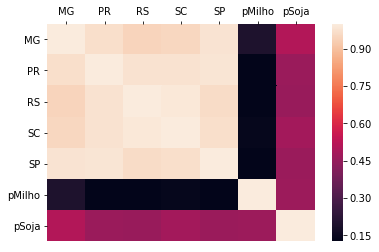

In [31]:
sns.heatmap(corrMat, vmax=1., square=False).xaxis.tick_top()
plt.show()

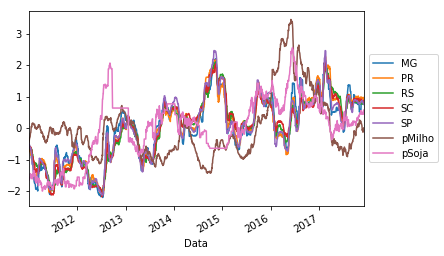

In [32]:
from sklearn.preprocessing import scale
dfPadronizado = scale(dfMerged)
dfPadronizado = pd.DataFrame(dfPadronizado, index=dfMerged.index, columns=dfMerged.columns)
ax = dfPadronizado.plot()
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

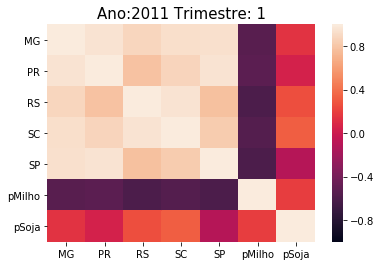

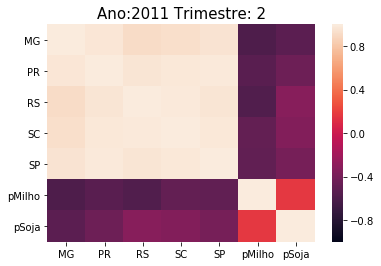

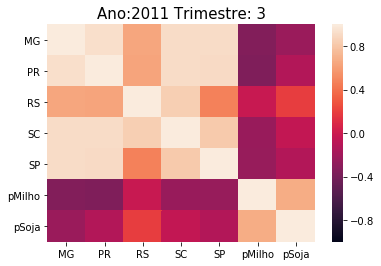

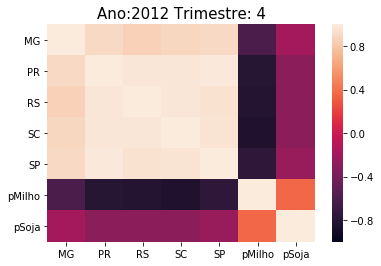

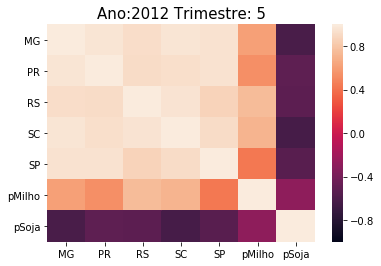

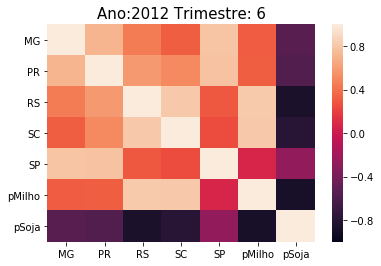

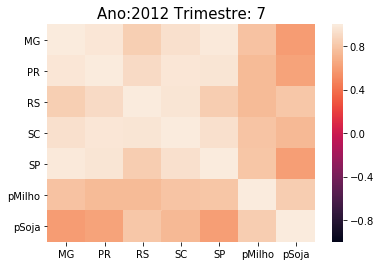

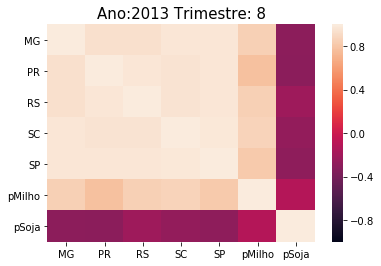

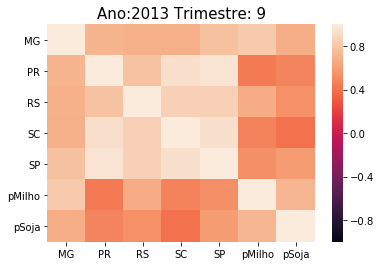

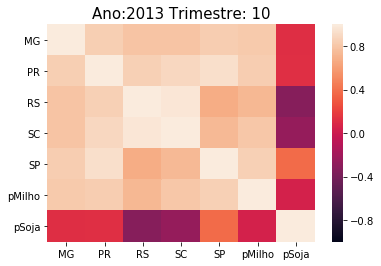

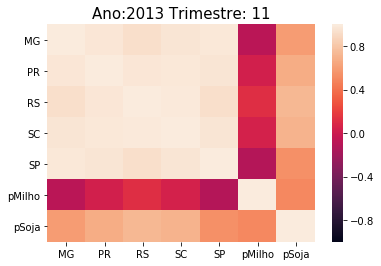

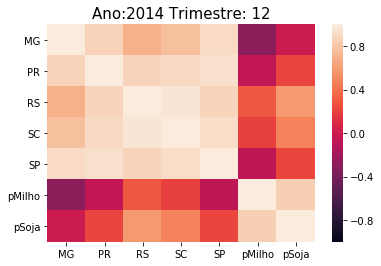

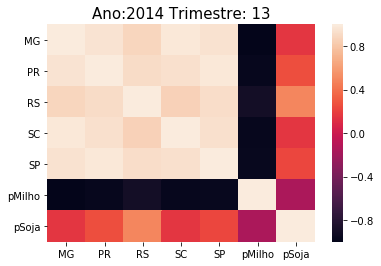

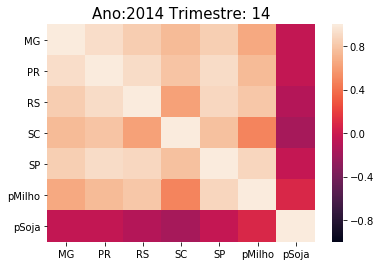

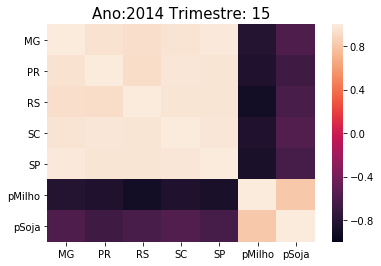

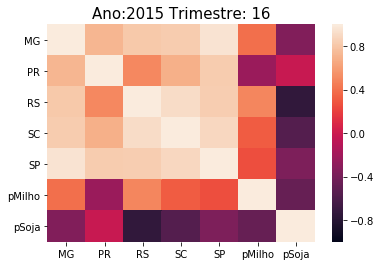

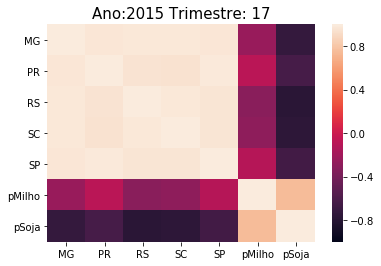

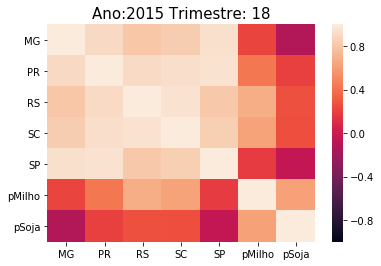

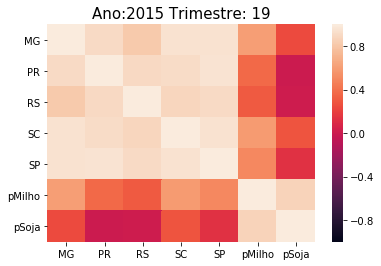

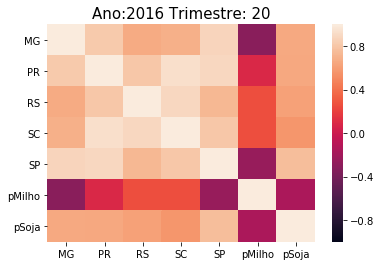

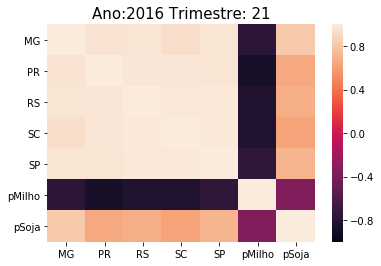

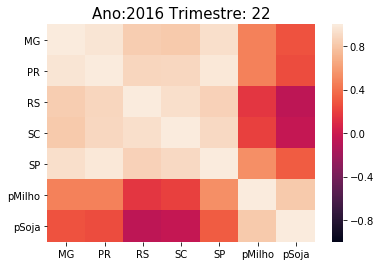

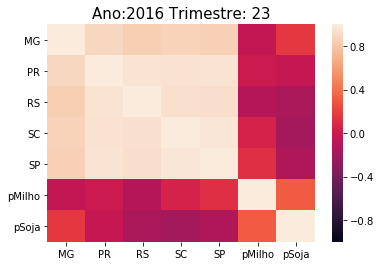

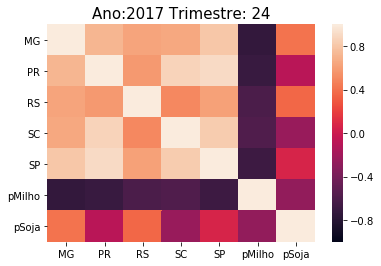

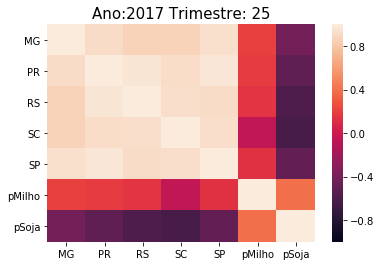

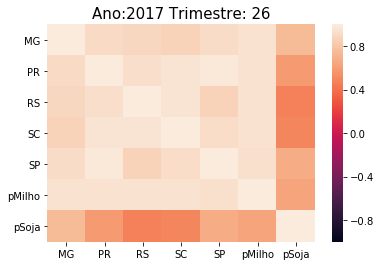

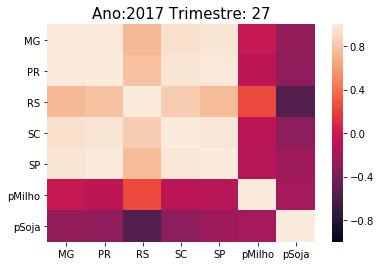

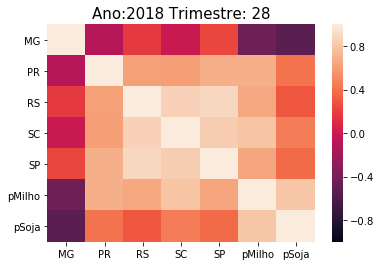

In [36]:
#fTrimestre = pd.DataFrame
dataInicial = dfMerged.index[0]
dataFinal = dataInicial + datetime.timedelta(days=90)
endData = datetime.datetime(day=4, month=12, year=2017)
i = int(1)
while dataFinal < endData:
    mascara = ((dfMerged.index >= dataInicial) & (dfMerged.index <= dataFinal))
    dfTrimestre = dfMerged.loc[mascara]
    dataInicial = dataFinal
    dataFinal =  dataInicial + datetime.timedelta(days=90)
    ax = plt.axes()
    corr = dfTrimestre.corr()
    heatMap = sns.heatmap(corr, vmax=1., vmin=-1., square=False)
    title = "Ano:" + str(dataFinal.year) + " Trimestre: " + str(i)
    ax.set_title(title, fontsize=15)
    plt.savefig("graph/heatmap"+str(i)+".png")
    plt.show()
    i += 1
    #print (dfTrimestre.head(5))
    #print(corr)

In [37]:
import glob
import imageio
import os

In [38]:
filenames = glob.glob("graph/*.png")
filenames.sort(key=os.path.getmtime)
duration = 0.5
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
output_file = "heatmapGif.gif"
imageio.mimsave(output_file, images, duration=duration)